In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import io
from PIL import Image
import glob
import os
import pandas as pd
import matplotlib
matplotlib.style.use('dark_background')
import re
import seaborn as sns
import sys
sys.path.append('/Users/ang/Seafile/BSc_code/')
from functions import *
import h5py



In [5]:
# Main processing loop for multiple files
pc = 'angela'
if pc == 'sophia':
    basevol='C:/Seafile/'
    basepath = basevol + '/BSc_data/'
    data_info = basepath + '/data_info/'
    output_folder = basepath + "/processed_data/"
    npz_directory = basepath + 'shark_tracking_data/'
    figures_path = basepath + "figures/"
    mat_file_path = basepath + 'carangids_manual_tracking/tracking/'
    npz_school_directory = basepath + 'school_tracking_data/'
else:
    basevol = '/Users/ang/Seafile/'
    basepath = basevol + '/BSc_data/'
    data_info = basepath + '/data_info/'
    output_folder = basepath + "/processed_data/"
    npz_directory = basepath + 'shark_tracking_data/'
    figures_path = basepath + "figures/"
    mat_file_path = basepath + 'carangids_manual_tracking/tracking/'
    trex_tracking_path = basevol + '/TRex_tracking_files/'
    npz_school_directory = basepath + 'school_tracking_data/'

In [6]:
moving_average_window = 8
fs = 50
cm_per_pixel = 1

In [4]:
# basepath + 'average_' + base_filename + ".png"

In [4]:
# # pc = 'PC'
# # if pc == 'PC':
# #     basevol = 'E:/sophia'
# # else:
# #     basevol = '/Volumes/SSD_various/'
    
# # basepath = basevol + '/shark_data/'
# # output_video_folder = basepath + "track_example_videos/"
# # npz_directory = basepath + 'data/' ##### Change with your path 
# # figures_path = basepath + "figures/"

# files_list = np.sort(glob.glob(npz_directory + "*0253*"))
# filename_with_extension = os.path.basename(files_list[0])
# filename = os.path.splitext(filename_with_extension)[0]
# base_filename = filename.rsplit('_', 1)[0]

# video_filename = trex_tracking_path + base_filename + ".MP4"
# settings_file_path = trex_tracking_path + base_filename + ".settings"
# ### Get settings info
# # cm_per_pixel = get_trex_settings_value(settings_file_path,'cm_per_pixel')

# # Get original file size info
# image_path = trex_tracking_path + 'average_' + base_filename + ".png"

# image = cv.imread(image_path)
# height, width = image.shape[:2]
# print(f"Dimensions of the image: Width = {width}, Height = {height}")

# moving_average_window = 12
# fs = 50
# cm_per_pixel = 1
# keys_to_extract = ["frame_segments","SPEED#wcentroid", "ANGLE","frame","time","poseX0",'poseY0',"poseX1",'poseY1',"poseX2",'poseY2',"poseX3",'poseY3',"poseX4",'poseY4',"poseX5",'poseY5',"poseX6",'poseY6',"poseX7",'poseY7',"poseX8",'poseY8']  # Add the specific keys you want to extract from npz file

# # cm_per_pixel  = 0.00390
# # video_height_cm = height*cm_per_pixel



# ### Get all filedata names
# fish_data = read_files(npz_directory,'npz',include_posture= True,prefix_filter = base_filename)

# npz_files = np.sort([file for files in fish_data.values() for file in files])
# print(npz_files)
# # 20240303_072831125_DJI_0266
# ### Defined what is schooling data and what is shark data
# fschool_files = [f for f in npz_files if 'fschool_posture' in f]
# shark_files = [f for f in npz_files if 'fschool' not in f]

# full_paths_sharks = [os.path.join(npz_directory, file) for file in shark_files]
# full_paths_schools = [os.path.join(npz_directory, file) for file in fschool_files]

In [6]:
# ### Load outline data
# data, screen, input_shape, output_shape = load_and_preprocess_outline_data(full_paths_schools,fs = fs)


In [7]:
# ### Load shark data
# sharks_df= read_npz_files(npz_directory,shark_files,keys_to_extract, cm_per_pixel,moving_average_window,smooth=True)

In [9]:
# # Main processing loop for multiple files
# pc = 'PC'
# if pc == 'PC':
#     basevol = 'E:/sophia'
# else:
#     basevol = '/Volumes/SSD_various/'
    
# basepath = basevol + '/shark_data/'
# output_folder = basepath + "processed_data/"
# npz_directory = basepath + 'data/'
# figures_path = basepath + "figures/"
# output_folder = basepath + "processed_data/"
# npz_directory = basepath + 'data/'
# figures_path = basepath + "figures/"

# List of trials to process
# file_filters = ["*0262*", "*0257*"]
# file_filters = ["*DJI_0242*"]
file_filters = ["*DJI_0139*","*DJI_0305*","*125_DJI_0266*","*124_DJI_0266*","*DJI_0257*","*DJI_0242*","*DJI_0502*","*DJI_0253*"]


for file_filter in file_filters:
    files_list = np.sort(glob.glob(npz_directory + file_filter))
    
    # Check if files_list is empty
    if not len(files_list):  # or simply: if not files_list
        print(f"No files found for {file_filter}")
        continue

    filename_with_extension = os.path.basename(files_list[0])
    filename = os.path.splitext(filename_with_extension)[0]
    base_filename = filename.rsplit('_', 1)[0]

    video_filename = trex_tracking_path + base_filename + ".MP4"
    settings_file_path = trex_tracking_path + base_filename + ".settings"
    image_path = trex_tracking_path + 'average_' + base_filename + ".png"

    image = cv.imread(image_path)
    height, width = image.shape[:2]
    print(f"Dimensions of the image: Width = {width}, Height = {height}")



    keys_to_extract = ["frame_segments","SPEED#wcentroid", "X#pcentroid", "Y#pcentroid", "ANGLE","frame","time","poseX0",'poseY0',"poseX1",'poseY1',"poseX2",'poseY2',"poseX3",'poseY3',"poseX4",'poseY4',"poseX5",'poseY5',"poseX6",'poseY6',"poseX7",'poseY7',"poseX8",'poseY8']

    fish_data = read_files(npz_directory,'npz',include_posture=True, prefix_filter=base_filename)
    school_data = read_files(npz_school_directory,'npz',include_posture=True, prefix_filter=base_filename)
    npz_files = [file for files in fish_data.values() for file in files]
    npz_files_school = [file for files in school_data.values() for file in files]


    shark_files = [f for f in npz_files if 'fschool' not in f]
    fschool_files = [f for f in npz_files_school if 'fschool_posture' in f]

    full_paths_sharks = [os.path.join(npz_directory, file) for file in shark_files]
    full_paths_schools = [os.path.join(npz_school_directory, file) for file in fschool_files]
    # full_paths_schools = [
    # os.path.join(npz_school_directory, f)
    # for f in os.listdir(npz_school_directory)
    # if f.endswith(".npz") and "_fschool_posture_" in f]
    
    print(f"Processing shark files for {base_filename}: {full_paths_sharks}")
    print(f"Processing school files for {base_filename}: {full_paths_schools}")

    # Process and save shark files
    if full_paths_sharks:
        sharks_df = read_npz_files(npz_directory, shark_files, base_filename, keys_to_extract, cm_per_pixel, moving_average_window, max_gap = 5, interpolate_nan=True, smooth=True)
        ### Add midpoint
        sharks_df['midpoint_x'] = (sharks_df['lxfinx'] + sharks_df['rxfinx']) / 2
        sharks_df['midpoint_y'] = (sharks_df['lxfiny'] + sharks_df['rxfiny']) / 2
        
        # Save sharks_df to HDF5
        sharks_output_file = os.path.join(output_folder, f"{base_filename}_sharks.h5")
        sharks_df.to_hdf(sharks_output_file, key='sharks', mode='w')
        print(f"Shark data saved to {sharks_output_file}")

    
    ### Comment this if you don't want school outline data
    
    # Process and save school files
    if full_paths_schools:
        school_data, school_screen, school_input_shape, school_output_shape = load_and_preprocess_outline_data(full_paths_schools)
        school_output_file = os.path.join(output_folder, f"{base_filename}_school.h5")
        # save_school_data_to_h5(school_data, school_screen, school_input_shape, school_output_shape, school_output_file)
        np.savez(output_folder + base_filename + '_school_data.npz', school_data=school_data, school_screen=school_screen, school_output_shape=school_output_shape)
        print(f"Outline data saved to {output_folder+ base_filename + '_school_data.npz'}")

Dimensions of the image: Width = 5120, Height = 2700
Processing shark files for sequence_20240306_161443984_DJI_0139: ['/Users/ang/Seafile//BSc_data/shark_tracking_data/sequence_20240306_161443984_DJI_0139_fish0.npz', '/Users/ang/Seafile//BSc_data/shark_tracking_data/sequence_20240306_161443984_DJI_0139_fish1.npz']
Processing school files for sequence_20240306_161443984_DJI_0139: ['/Users/ang/Seafile//BSc_data/school_tracking_data/sequence_20240306_161443984_DJI_0139_fschool_posture_fish3.npz', '/Users/ang/Seafile//BSc_data/school_tracking_data/sequence_20240306_161443984_DJI_0139_fschool_posture_fish0.npz']
Processing file: sequence_20240306_161443984_DJI_0139_fish0.npz
Processing file: sequence_20240306_161443984_DJI_0139_fish1.npz
Shark data saved to /Users/ang/Seafile//BSc_data//processed_data/sequence_20240306_161443984_DJI_0139_sharks.h5
Outline data saved to /Users/ang/Seafile//BSc_data//processed_data/sequence_20240306_161443984_DJI_0139_school_data.npz
Dimensions of the image:

In [10]:
npz_directory

'/Users/ang/Seafile//BSc_data/shark_tracking_data/'

In [11]:
sharks_df.groupby(['tracklet','segment']).count()

,,SPEED#wcentroid,ID,ANGLE,frame,time,headx,heady,lxfinx,lxfiny,btipx,...,sdfiny,pedunclex,peduncley,finx,finy,ttipx,ttipy,Trial,midpoint_x,midpoint_y
tracklet,segment,,,,,,,,,,,,,,,,,,,,,
1.0,1.0,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2.0,2.0,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3.0,3.0,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4.0,4.0,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5.0,5.0,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115.0,11.0,2225,2225,0,2225,2225,2225,2225,2225,2225,2225,...,2225,2225,2225,2225,2225,2225,2225,2225,2225,2225
116.0,12.0,3499,3499,0,3499,3499,3499,3499,3499,3499,3499,...,3499,3499,3499,3499,3499,3499,3499,3499,3499,3499
117.0,13.0,3843,3843,0,3843,3843,3843,3843,3843,3843,3843,...,3843,3843,3843,3843,3843,3843,3843,3843,3843,3843


In [12]:
sharks_df[sharks_df['frame']==3053]

,SPEED#wcentroid,ID,ANGLE,frame,time,headx,heady,lxfinx,lxfiny,btipx,...,peduncley,finx,finy,ttipx,ttipy,segment,Trial,tracklet,midpoint_x,midpoint_y
2349,NaN,0,NaN,3053,60.99,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,sequence_20240305_063615511_DJI_0253,NaN,NaN,NaN
92859,NaN,1,NaN,3053,60.99,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,sequence_20240305_063615511_DJI_0253,NaN,NaN,NaN


In [13]:
midpoints = [('headx', 'heady'),('btipx', 'btipy'), ('pelvicfinx', 'pelvicfiny'), ('sdfinx', 'sdfiny'), ('pedunclex', 'peduncley'), ('finx','finy'), ('ttipx', 'ttipy')]
x_vals = [x for x, y in midpoints]


In [14]:
# len(np.where(onef['segment'].isna())[0])

In [15]:
# short

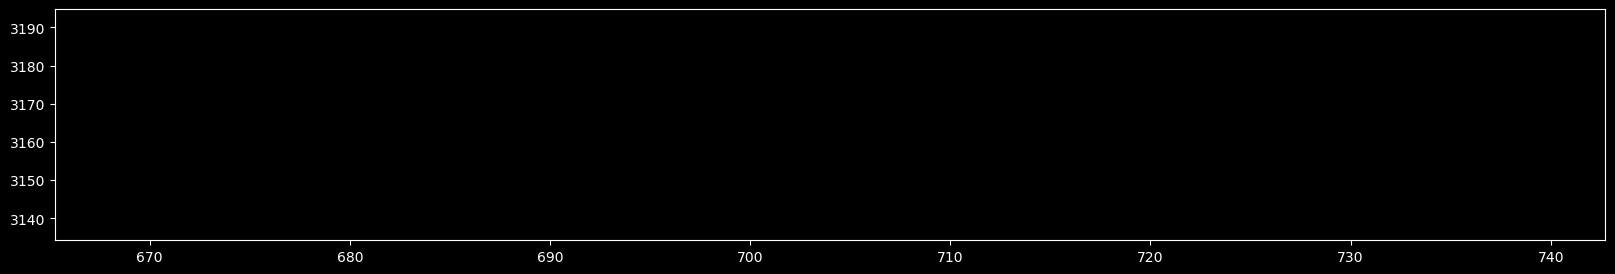

In [27]:
fig, axes = plt.subplots(1, 1, figsize=(20,3))

onef = sharks_df[sharks_df['ID'] == 0]
seg = np.random.choice(onef.segment.unique())
short = onef[onef['segment'] == seg]
 
# Loop through midpoints (assuming it is defined as pairs of x_col and y_col)
for i, x_col in enumerate(x_vals):
    plt.plot(short['frame'], short[x_col], color="blue", alpha=0.8)
        



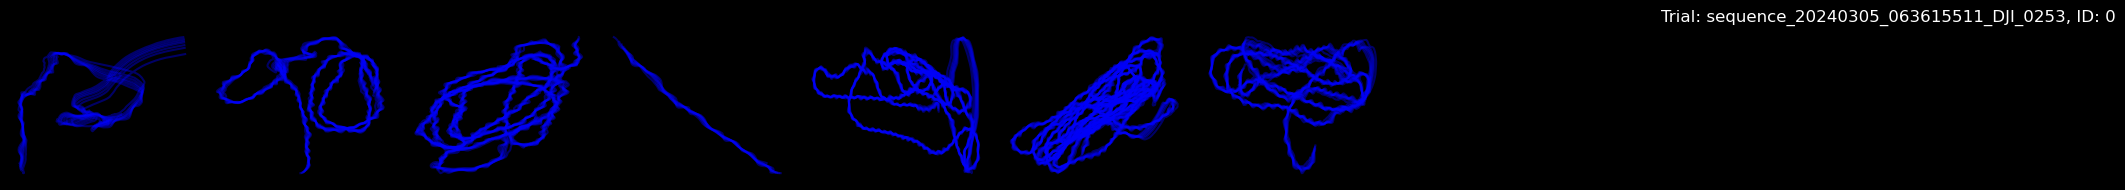

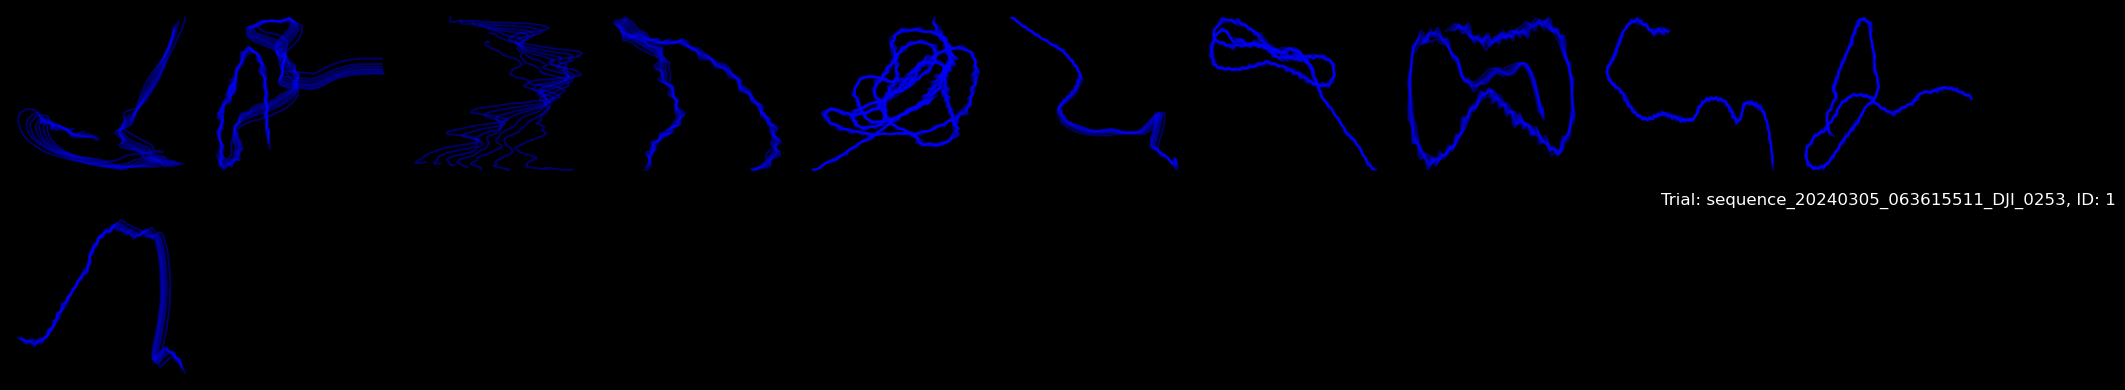

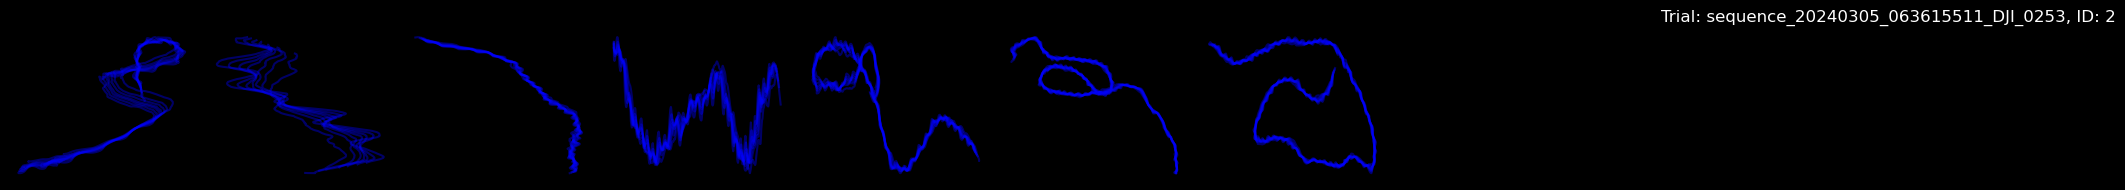

In [19]:
# Get all unique IDs in the dataset
#unique_sequence = sharks_df['Trial'].unique()
for trial in sharks_df.Trial.unique():
    onetrial = sharks_df[sharks_df['Trial'] == trial]
    unique_ids = onetrial['ID'].unique()
    for current_id in unique_ids:
        # Filter data for the current ID
        onef = onetrial[onetrial['ID'] == current_id]
        
        # Filter segments that have more than 100 frames
        segment_counts = onef['segment'].value_counts()
        segments_to_plot = np.sort(segment_counts[segment_counts > 100].index)
    
        # If no segments have more than 100 frames, skip this ID
        if len(segments_to_plot) == 0:
            continue
    
        # Define the number of subplots (adjust rows and columns based on the number of valid segments)
        num_segments = len(segments_to_plot)
        num_rows = (num_segments // 10) + 1
        fig, axes = plt.subplots(num_rows, 10, figsize=(20, num_rows * 2))
        
        # Flatten axes to easily iterate
        axes = axes.flatten()
    
        # Loop through the valid segments and plot in subplots
        for idx, (ax, segment) in enumerate(zip(axes, segments_to_plot)):
            # Filter data for the current segment
            short = onef[onef['segment'] == segment]
            
            # Loop through midpoints (assuming it is defined as pairs of x_col and y_col)
            for i, (x_col, y_col) in enumerate(midpoints):
                ax.plot(short[x_col], short[y_col], color="blue", alpha=0.4)
                

            # Optionally set a title with the segment information
            
            ax.axis('off')
    
        # Hide any unused subplots if necessary
        for ax in axes[len(segments_to_plot):]:
            ax.axis('off')
        ax.set_title(f"Trial: {trial}, ID: {current_id}")
        # Adjust the layout and show the plot for the current ID
        plt.tight_layout()
        plt.show()


In [20]:
# sharks_df['tracklet'].unique()

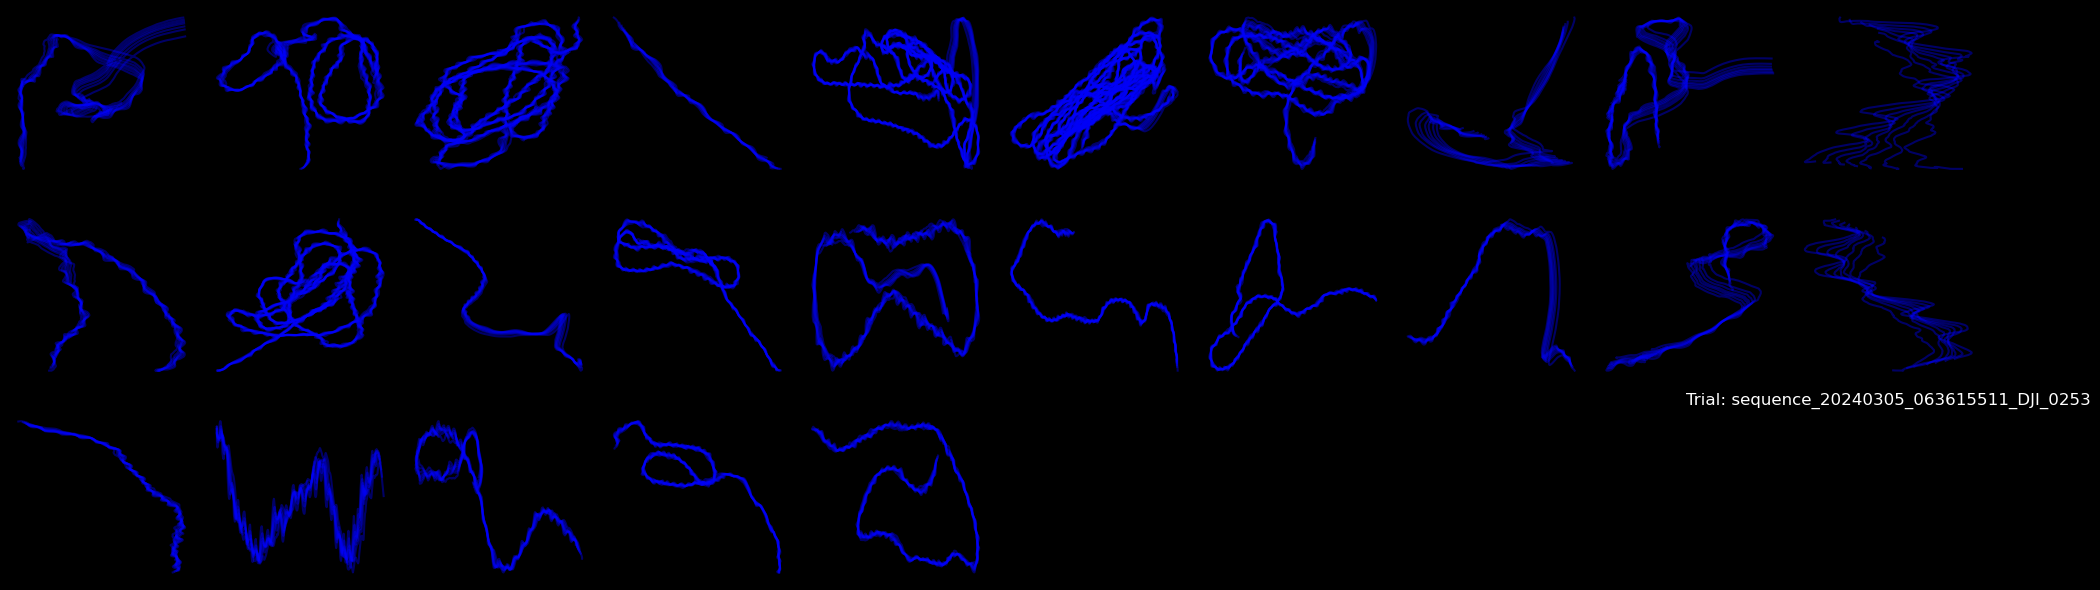

In [21]:
# Plot all segments without dividing by ID
for trial in sharks_df.Trial.unique():
    onetrial = sharks_df[sharks_df['Trial'] == trial]
    
    # Filter segments that have more than 100 frames
    segment_counts = onetrial['tracklet'].value_counts()
    segments_to_plot = np.sort(segment_counts[segment_counts > 100].index)
    
    if len(segments_to_plot) == 0:
        continue
    
    num_segments = len(segments_to_plot)
    num_rows = (num_segments // 10) + 1
    fig, axes = plt.subplots(num_rows, 10, figsize=(20, num_rows * 2))
    axes = axes.flatten()
    
    for idx, (ax, segment) in enumerate(zip(axes, segments_to_plot)):
        short = onetrial[onetrial['tracklet'] == segment]
        
        for x_col, y_col in midpoints:
            ax.plot(short[x_col], short[y_col], color="blue", alpha=0.4)
        
        ax.axis('off')
    
    for ax in axes[len(segments_to_plot):]:
        ax.axis('off')
    
    ax.set_title(f"Trial: {trial}")
    plt.tight_layout()
    plt.show()

In [ ]:
# def display_dict_structure(data_dict, indent=0, max_items=10):
#     indent_str = '  ' * indent  # Indentation for better readability
#     for key, value in data_dict.items():
#         if isinstance(value, dict):
#             print(f"{indent_str}{key}: (dict) -> {len(value)} keys")
#             if len(value) > max_items:  # If there are too many keys, summarize
#                 print(f"{indent_str}  ... and {len(value) - max_items} more keys")
#                 keys_to_show = list(value.keys())[:max_items]
#             else:
#                 keys_to_show = value.keys()
#             for subkey in keys_to_show:
#                 print(f"{indent_str}  {subkey}:")
#                 display_dict_structure({subkey: value[subkey]}, indent + 2)  # Show fewer items

#         elif isinstance(value, list):
#             print(f"{indent_str}{key}: (list) -> {len(value)} items")
#             if len(value) > max_items:
#                 print(f"{indent_str}  Showing first {max_items} items:")
#                 value = value[:max_items]
#             for item in value:
#                 display_dict_structure({key: item}, indent + 1)

#         elif isinstance(value, np.ndarray):
#             print(f"{indent_str}{key}: (numpy array) -> shape: {value.shape}, dtype: {value.dtype}")

#         elif isinstance(value, (str, int, float)):
#             print(f"{indent_str}{key}: ({type(value).__name__}) -> {value}")

#         else:
#             print(f"{indent_str}{key}: ({type(value).__name__}) -> Cannot determine exact details")

# # Usage example
# display_dict_structure(school_data, max_items=5)